In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_all(cpufile, netfile, title=''):
    # parse and compute total CPU usage
    df_cpu = pd.read_csv(cpufile, sep=",", header=0, index_col=['Time'])
    df_cpu['%tot_used'] = df_cpu.apply(lambda row: (100. - row['%idle'])*.01, axis=1)

    # parse the network counters -- for overlaying the byte flow into the eth port
    df_net = pd.read_csv(netfile, sep=",", header=0, index_col=['Time'])
    
    # plot the total cpu usage we computed above
    fig, ax = plt.subplots(figsize=(10,8))
    df_cpu.groupby('CPU')['%tot_used'].plot(ax=ax, legend=True, grid=True, title=title, ylim=(0,1.0))
    ax.set_ylabel('% CPU Utilization')
    ax.tick_params(labelbottom=False)    
    
    # overlay the rx data on the network so we can visually cross-correlate the interesting time slices
    ax2 = ax.twinx()
    df_net.groupby('IFACE')['rxkB/s'].plot(ax=ax2, legend=False, ylim=(0,100000), linestyle='--', alpha=0.5)
    ax2.set_ylabel('rxKB/s')
    ax2.tick_params(labelbottom=False)    
    
    return df_cpu, df_net

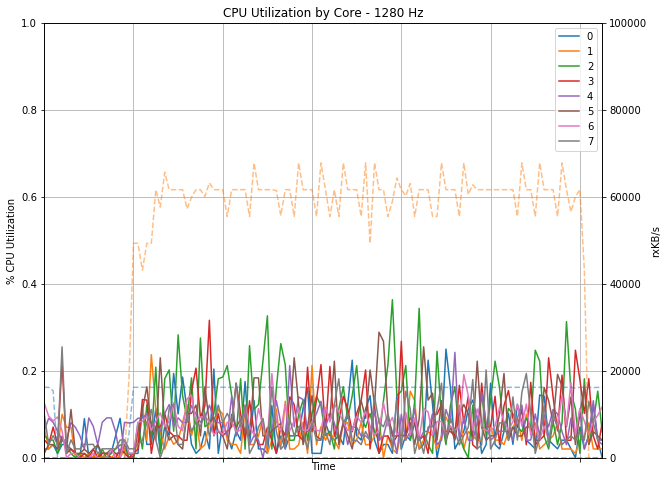

In [2]:
df_cpu_1280, df_net_1280 = cpu_1280_df = plot_all('cpu_1280.csv', 'net_1280.csv', title='CPU Utilization by Core - 1280 Hz')

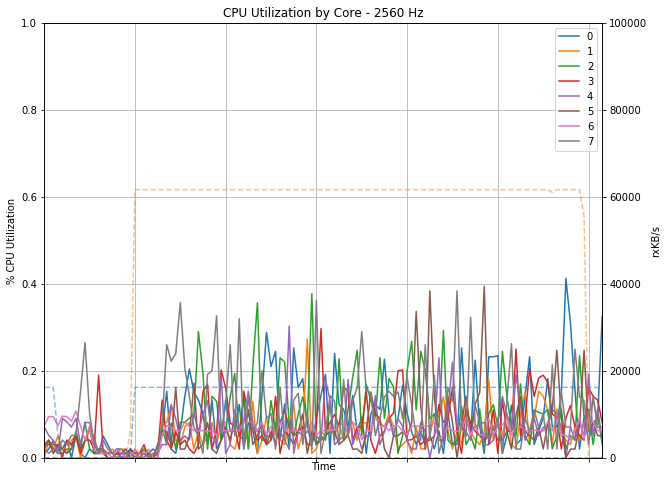

In [3]:
df_cpu_2560, df_net_2560 = cpu_2560_df = plot_all('cpu_2560.csv', 'net_2560.csv', title='CPU Utilization by Core - 2560 Hz')

In [4]:
df_cpu_2560.describe()['%idle']

count    1056.000000
mean       92.479574
std         6.660468
min        58.760000
25%        90.620000
50%        93.940000
75%        96.970000
max       100.000000
Name: %idle, dtype: float64

In [5]:
df_cpu_1280.describe()['%idle']

count    1032.000000
mean       92.690930
std         5.769102
min        63.640000
25%        89.900000
50%        93.940000
75%        96.940000
max       100.000000
Name: %idle, dtype: float64